# 1. はじめに

本文章では、2次元上で線形分類できないデータセットに対し、カーネルSVMの基本的な考え方である**高次元へ射影して線形分離できるようにする**を可視化することで理解を深めることを目的とする。

# 2. 準備

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 3. 使用するデータセット

半月状に分布する2次元の非線形データ。
直線では分離できない構造を持つ。

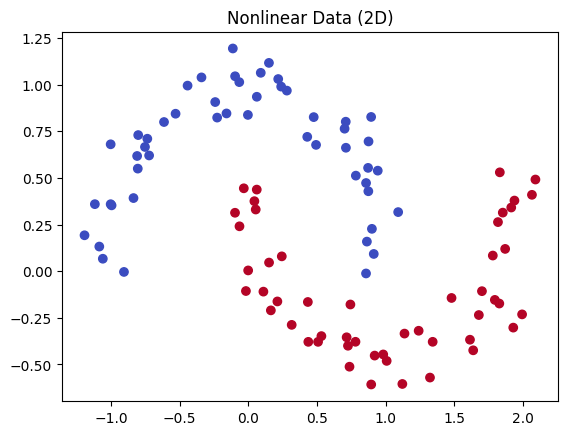

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title("Nonlinear Data (2D)")
plt.show()

# 4. 2次元平面での非線形分離

In [3]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0, gamma=0.5)
model.fit(X, y)

SVC(gamma=0.5)

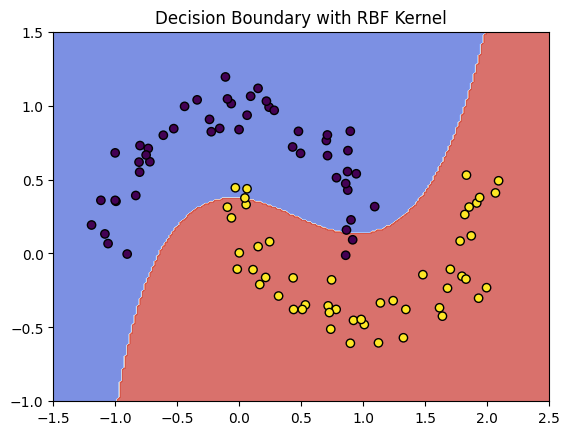

In [4]:
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 200), np.linspace(-1, 1.5, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Decision Boundary with RBF Kernel")
plt.show()


# 5. 3次元空間への射影

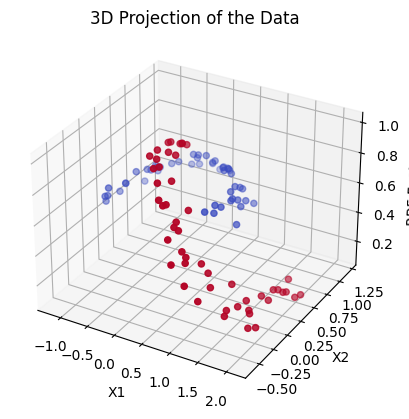

In [5]:
def rbf_projection(X, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(X, axis=1)**2)

Z = rbf_projection(X)
X_projected = np.hstack((X, Z.reshape(-1, 1)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap=plt.cm.coolwarm)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('RBF Feature')
plt.title("3D Projection of the Data")
plt.show()


# 6. 3次元空間での線形分離

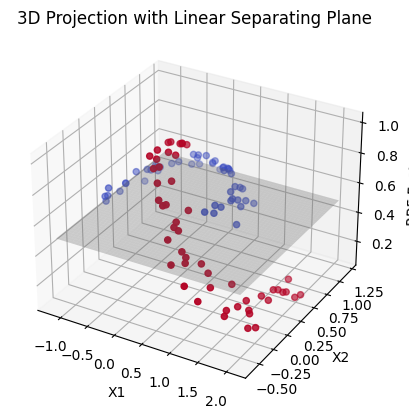

In [6]:
xx, yy = np.meshgrid(np.linspace(X_projected[:, 0].min(), X_projected[:, 0].max(), 50),
                     np.linspace(X_projected[:, 1].min(), X_projected[:, 1].max(), 50))
zz = np.full(xx.shape, 0.5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap=plt.cm.coolwarm)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('RBF Feature')
plt.title("3D Projection with Linear Separating Plane")
plt.show()
